**CX 4240 Project: Exporatory Models**

The following work is based on experimentation in enriching our dataset to provide greater insights to investors. It does exceed our original project scope but was done with the intent to better understand relationships between features we had already explored and with the idea that exploring a continuous irrAchievedRatio will provide investors with greater knowledge on ROI quality beyond just the success or failure of an SIB, which we mainly focused on in our original two-fold strategy. Creating this field creates a normalized score of how well a project performed compared to expectations, allowing us to both enrich the dataset with an additional field and potentially derive a greater breadth of predictive knowledge for investors who want to generate the greatest return for minimized risks.

In [1]:
!pip install pandas

In [2]:
!pip install matplotlib

In [5]:
!pip install seaborn

In [6]:
!pip install scikit-learn

In [7]:
!pip install Jinja2

In [8]:
!pip install statsmodels

In [4]:
# Import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
from pathlib import Path
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
# Check directory
Path.cwd()

WindowsPath('c:/Users/Hollo/OneDrive - Georgia Institute of Technology/cx4240')

**Import Datasets**

In [6]:
# Load datasets
projectInv = pd.read_csv("new synth data/Structured_Project_Investments.csv") # please change directed location if necessary
projectMetrics = pd.read_csv("new synth data/Structured_Outcome_Metrics.csv")
projectPayments = pd.read_csv("new synth data/Structured_Outcome_Payments.csv")
projectData = pd.read_csv("new synth data/Structured_Projects_Data.csv")


In [7]:
# See projectData

# Determine Shape and head of data
print(projectData.shape)
projectData.head()


(314, 44)


,ID,Impact Bond Name,Stage of Development,Dates - Date outcomes contract signed - (Value),Dates - Date contracts between all parties signed - (Value),Dates - Anticipated completion date - (Value),Dates - Actual completion date - (Value),Dates - Start date of service provision - (Value),Dates - Anticipated end date of service provision - (Value),Dates - Actual end date of service provision - (Value),...,Purpose and classifications - Social challenge - (Value),Purpose and classifications - Policy sector - (Value),Purpose and classifications - Primary SDG goal - (Value),Purpose and classifications - Secondary SDG goals - (Value),Purpose and classifications - Primary SDG target - (Value),Purpose and classifications - Secondary SDG targets - (Value),Service and beneficiaries - Target population - (Value),Service and beneficiaries - Targeted number of unique service users or beneficiaries (total) - (Value),Service and beneficiaries - Actual number of unique service users or beneficiaries engaged (total) - (Value),success
0,INDIGO-POJ-0001,Proyecta Tu Futuro [Plan Your Future] - Buenos...,Complete,2010-07-24,2010-07-24,2013-02-06,2013-02-06,2010-07-24,2013-02-06,2013-02-06,...,Homelessness,Education,SDG 4,SDG 3,Target 10.4,Target 1.1,Youth,438,359,1
1,INDIGO-POJ-0002,Aspire Social Impact Bond Adelaide,Implementation,2024-07-29,2024-07-29,2029-07-04,2029-07-04,2024-07-29,2029-07-04,2029-07-04,...,Homelessness,Education,SDG 15,SDG 9,Target 1.2,Target 7.3,Refugees,420,275,1
2,INDIGO-POJ-0003,Benevolent Society Social Benefit Bond (New So...,Planned,2018-07-10,2018-07-10,2020-01-24,2020-01-24,2018-07-10,2020-01-24,2020-01-24,...,Mental health,Criminal justice,SDG 9,SDG 2,Target 8.5,Target 2.4,Youth,500,390,1
3,INDIGO-POJ-0004,Journey to Social Inclusion (Victoria),Implementation,2025-10-20,2025-10-20,2027-03-11,2027-03-11,2025-10-20,2027-03-11,2027-03-11,...,Homelessness,Employment and training,SDG 3,SDG 8,Target 2.4,Target 5.4,Refugees,579,539,1
4,INDIGO-POJ-0005,New South Wales Newpin Social Benefit Bond,Complete,2025-09-28,2025-09-28,2030-07-28,2030-07-28,2025-09-28,2030-07-28,2030-07-28,...,Mental health,Criminal justice,SDG 8,SDG 6,Target 8.4,Target 5.5,Women,532,386,1


In [ ]:
# projectData column data types and missing values

print('projectData Info:')
print(projectData.info())



projectData Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 44 columns):
 #   Column                                                                                                        Non-Null Count  Dtype  
---  ------                                                                                                        --------------  -----  
 0   ID                                                                                                            314 non-null    object 
 1   Impact Bond Name                                                                                              314 non-null    object 
 2   Stage of Development                                                                                          314 non-null    object 
 3   Dates - Date outcomes contract signed - (Value)                                                               314 non-null    object 
 4   Dates - Date contracts between all par

In [8]:
# See projectPayments

# Determine Shape and head of data
print(projectPayments.shape)
projectPayments.head()


(314, 8)


,Project ID,Outcome Metric Id - (Value),Period - Start - (Value),Period - End - (Value),Type - (Value),Payments - Currency - (Value),Payments - Amount - (Value),Payments - Amount USD - (Value)
0,INDIGO-POJ-0001,metric-0001,2023-05,2024-04,Actual,GBP,83613.34,91974.67
1,INDIGO-POJ-0002,metric-0002,2012-01,2012-07,Actual,CAD,136164.49,149780.94
2,INDIGO-POJ-0003,metric-0003,2019-09,2020-05,Actual,EUR,33352.20,36687.42
3,INDIGO-POJ-0004,metric-0004,2018-11,2019-04,Actual,USD,94788.72,104267.59
4,INDIGO-POJ-0005,metric-0005,2012-12,2013-09,Actual,USD,128233.26,141056.59


In [9]:
# projectPayments column data types and missing values

print('projectPayments Info:')
print(projectPayments.info())

projectPayments Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Project ID                       314 non-null    object 
 1   Outcome Metric Id - (Value)      314 non-null    object 
 2   Period - Start - (Value)         314 non-null    object 
 3   Period - End - (Value)           314 non-null    object 
 4   Type - (Value)                   314 non-null    object 
 5   Payments - Currency - (Value)    314 non-null    object 
 6   Payments - Amount - (Value)      314 non-null    float64
 7   Payments - Amount USD - (Value)  314 non-null    float64
dtypes: float64(2), object(6)
memory usage: 19.8+ KB
None


In [16]:
# See projectMetrics

# Determine Shape and head of data
print(projectMetrics.shape)
projectMetrics.head()


(314, 13)


,Project ID,Outcome Metric ID,Outcome Pricing,Outcome Definition - (Value),Target Population - (Value),Targeted number of service users Or beneficiaries (total) - (Value),Unit type of targeted Service users or beneficiaries - (Value),Outcome metric target - (Value),Policy sector - (Value),Primary SDG goal - (Value),Secondary SDG goals - (Value),Primary SDG target - (Value),Secondary SDG targets - (Value)
0,INDIGO-POJ-0001,metric-0001,405.89,Improved outcomes for individuals in education...,Youth,438,Individual,284,Education,SDG 4,SDG 3,Target 10.4,Target 1.1
1,INDIGO-POJ-0002,metric-0002,752.29,Improved outcomes for individuals in education...,Refugees,420,Individual,273,Education,SDG 15,SDG 9,Target 1.2,Target 7.3
2,INDIGO-POJ-0003,metric-0003,158.82,Improved outcomes for individuals in criminal ...,Youth,500,Individual,300,Criminal justice,SDG 9,SDG 2,Target 8.5,Target 2.4
3,INDIGO-POJ-0004,metric-0004,383.76,Improved outcomes for households in employment...,Refugees,579,Household,347,Employment and training,SDG 3,SDG 8,Target 2.4,Target 5.4
4,INDIGO-POJ-0005,metric-0005,585.54,Improved outcomes for households in criminal j...,Women,532,Household,319,Criminal justice,SDG 8,SDG 6,Target 8.4,Target 5.5


In [17]:
# projectMetrics column data types and missing values

print('projectMetrics Info:')
print(projectMetrics.info())


projectMetrics Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 13 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Project ID                                                           314 non-null    object 
 1   Outcome Metric ID                                                    314 non-null    object 
 2   Outcome Pricing                                                      314 non-null    float64
 3   Outcome Definition - (Value)                                         314 non-null    object 
 4   Target Population - (Value)                                          314 non-null    object 
 5   Targeted number of service users Or beneficiaries (total) - (Value)  314 non-null    int64  
 6   Unit type of targeted Service users or beneficiaries - (Value)       314 non-null    

In [18]:
# See projectInv

# Determine Shape and head of data
print(projectInv.shape)
projectInv.head()


(314, 4)


,Project ID,Total investment commitment,Maximum potential outcome payment,Outcome pricing
0,INDIGO-POJ-0001,249816.05,203880.14,405.89
1,INDIGO-POJ-0002,162407.46,325905.17,752.29
2,INDIGO-POJ-0003,123233.44,77460.18,158.82
3,INDIGO-POJ-0004,108233.80,242217.67,383.76
4,INDIGO-POJ-0005,432977.06,309846.19,585.54


In [19]:
# projectInv column data types and missing values

print('projectInv Info:')
print(projectInv.info())

projectInv Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 4 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Project ID                         314 non-null    object 
 1   Total investment commitment        314 non-null    float64
 2   Maximum potential outcome payment  314 non-null    float64
 3   Outcome pricing                    314 non-null    float64
dtypes: float64(3), object(1)
memory usage: 9.9+ KB
None


**Data Exploration & Validation**

In [10]:
# Merge all datasets together

# First merge: projects + metrics
data = pd.merge(projectMetrics, projectData, left_on = "Project ID", right_on = "ID", how = "left")

# Second merge: add investments
data = pd.merge(data, projectInv, on = "Project ID", how = "left")

# Check columns and shape
print(data.columns)
print(data.shape)
data.head()


Index(['Project ID', 'Outcome Metric ID', 'Outcome Pricing',
       'Outcome Definition - (Value)', 'Target Population - (Value)',
       'Targeted number of service users Or beneficiaries (total) - (Value)',
       'Unit type of targeted Service users or beneficiaries - (Value)',
       'Outcome metric target - (Value)', 'Policy sector - (Value)',
       'Primary SDG goal - (Value)', 'Secondary SDG goals - (Value)',
       'Primary SDG target - (Value)', 'Secondary SDG targets - (Value)', 'ID',
       'Impact Bond Name', 'Stage of Development',
       'Dates - Date outcomes contract signed - (Value)',
       'Dates - Date contracts between all parties signed - (Value)',
       'Dates - Anticipated completion date - (Value)',
       'Dates - Actual completion date - (Value)',
       'Dates - Start date of service provision - (Value)',
       'Dates - Anticipated end date of service provision - (Value)',
       'Dates - Actual end date of service provision - (Value)',
       'Dates - An

,Project ID,Outcome Metric ID,Outcome Pricing,Outcome Definition - (Value),Target Population - (Value),Targeted number of service users Or beneficiaries (total) - (Value),Unit type of targeted Service users or beneficiaries - (Value),Outcome metric target - (Value),Policy sector - (Value),Primary SDG goal - (Value),...,Purpose and classifications - Secondary SDG goals - (Value),Purpose and classifications - Primary SDG target - (Value),Purpose and classifications - Secondary SDG targets - (Value),Service and beneficiaries - Target population - (Value),Service and beneficiaries - Targeted number of unique service users or beneficiaries (total) - (Value),Service and beneficiaries - Actual number of unique service users or beneficiaries engaged (total) - (Value),success,Total investment commitment,Maximum potential outcome payment,Outcome pricing
0,INDIGO-POJ-0001,metric-0001,405.89,Improved outcomes for individuals in education...,Youth,438,Individual,284,Education,SDG 4,...,SDG 3,Target 10.4,Target 1.1,Youth,438,359,1,249816.05,203880.14,405.89
1,INDIGO-POJ-0002,metric-0002,752.29,Improved outcomes for individuals in education...,Refugees,420,Individual,273,Education,SDG 15,...,SDG 9,Target 1.2,Target 7.3,Refugees,420,275,1,162407.46,325905.17,752.29
2,INDIGO-POJ-0003,metric-0003,158.82,Improved outcomes for individuals in criminal ...,Youth,500,Individual,300,Criminal justice,SDG 9,...,SDG 2,Target 8.5,Target 2.4,Youth,500,390,1,123233.44,77460.18,158.82
3,INDIGO-POJ-0004,metric-0004,383.76,Improved outcomes for households in employment...,Refugees,579,Household,347,Employment and training,SDG 3,...,SDG 8,Target 2.4,Target 5.4,Refugees,579,539,1,108233.80,242217.67,383.76
4,INDIGO-POJ-0005,metric-0005,585.54,Improved outcomes for households in criminal j...,Women,532,Household,319,Criminal justice,SDG 8,...,SDG 6,Target 8.4,Target 5.5,Women,532,386,1,432977.06,309846.19,585.54


In [11]:
# Drop duplicates and then check shape and data info

data.drop_duplicates(inplace= True)
print(data.shape)
data.info()

(314, 60)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 60 columns):
 #   Column                                                                                                        Non-Null Count  Dtype  
---  ------                                                                                                        --------------  -----  
 0   Project ID                                                                                                    314 non-null    object 
 1   Outcome Metric ID                                                                                             314 non-null    object 
 2   Outcome Pricing                                                                                               314 non-null    float64
 3   Outcome Definition - (Value)                                                                                  314 non-null    object 
 4   Target Population - (Value)                   

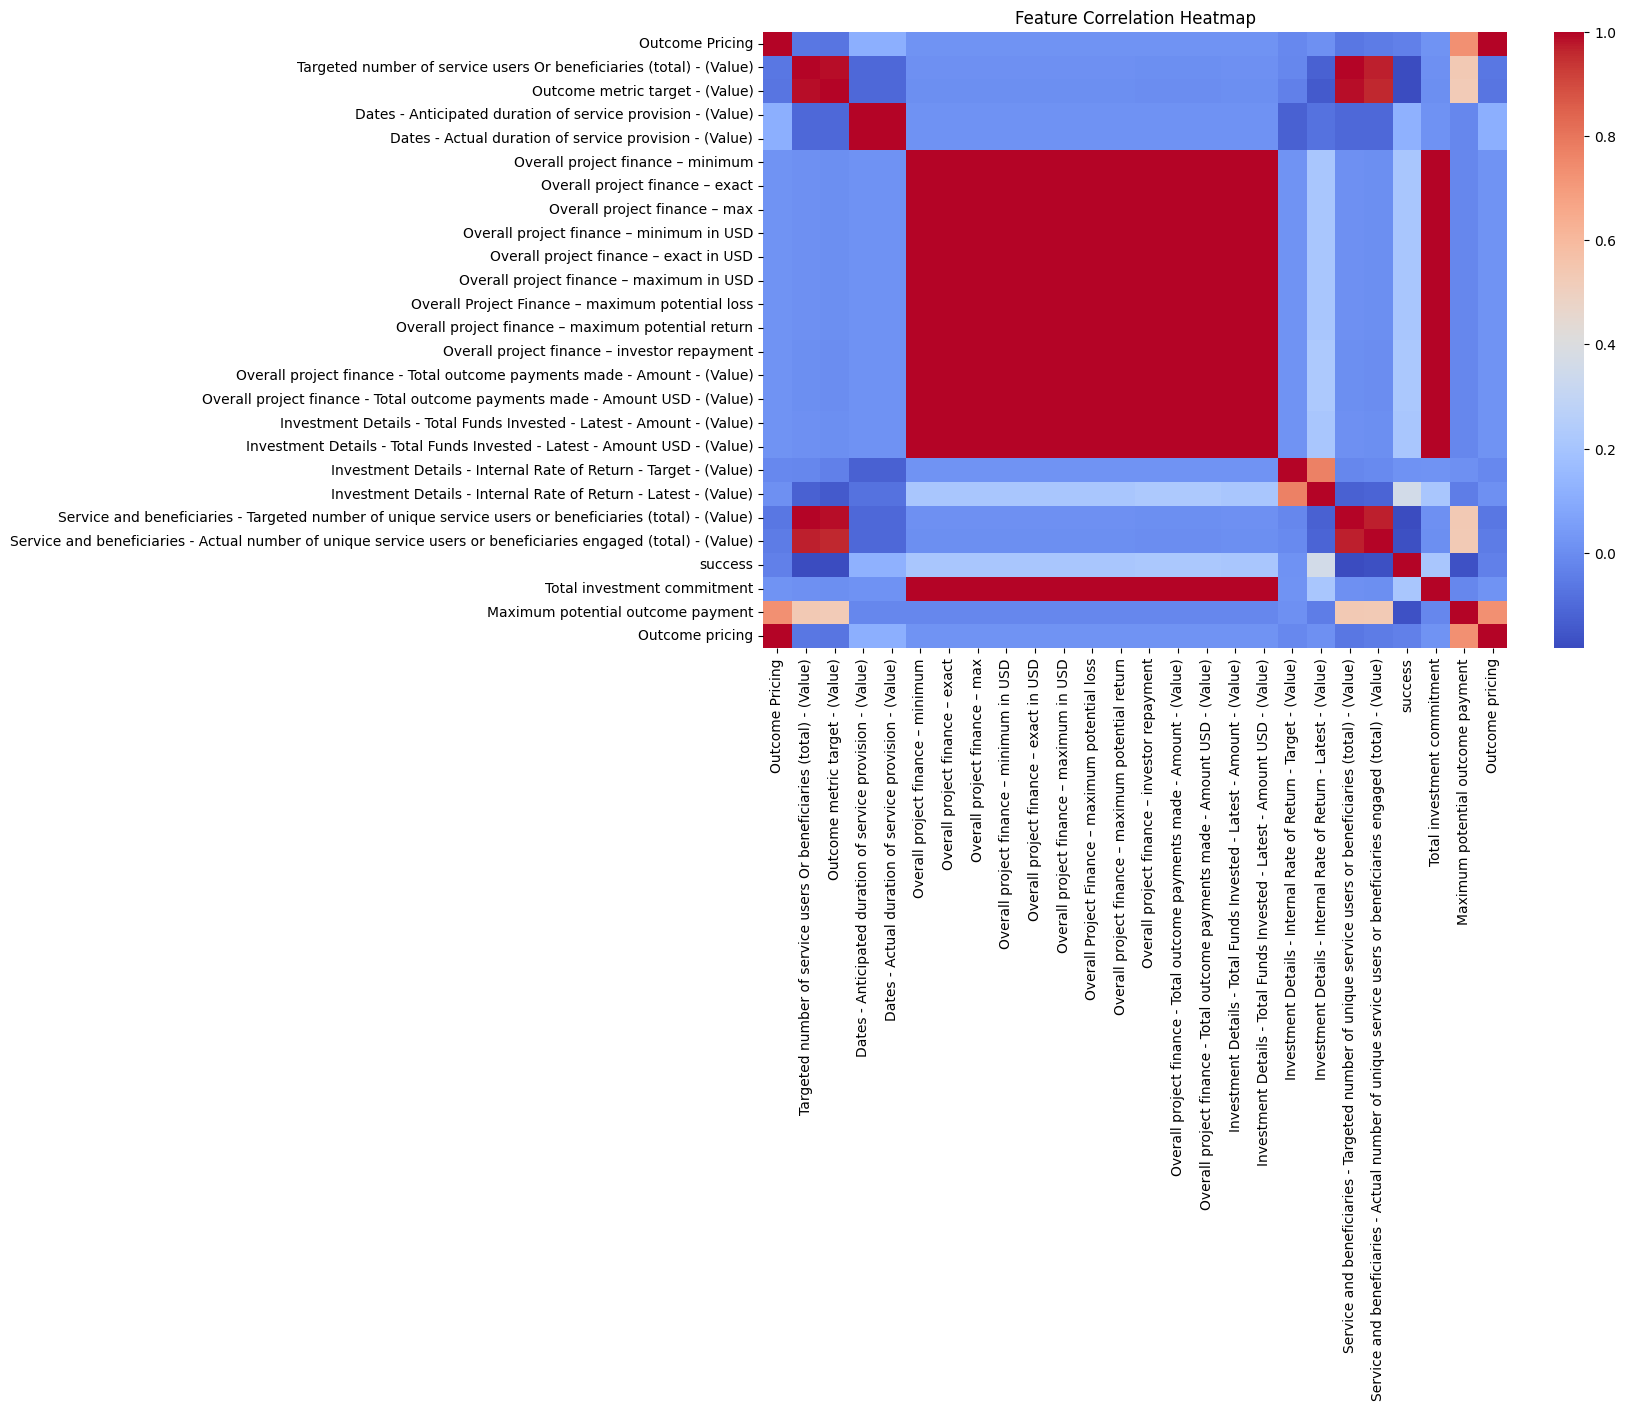

In [22]:
# Correlation matrix with all numeric data

numeric_data = data.select_dtypes(include=['number'])

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()


In the following code block, we explored two routes of data enrichment by calculating two additional fields: 
1. targetAchievedRatio determined a ratio between the actual users effected and the amount of target users
2. irrAchievedRatio determined the ratio between actual IRR achieved and the target IRR

**While we interested to see if either of our fields showed correlation with our categorical variables, we ultimately decided to use irrAchievedRatio, which aligned better with the rest of our project as neither showed significant relationships with other features.**

In [12]:
# Correlation between categories and potential calculated fields

# Add a calculated column to determine the success rate of the actual users effected and the target users
data['targetAchievedRatio'] = data['Service and beneficiaries - Actual number of unique service users or beneficiaries engaged (total) - (Value)'] / data['Service and beneficiaries - Targeted number of unique service users or beneficiaries (total) - (Value)']

# Add a calculated column to determine the actual IRR achieved and the target IRR - THIS IS THE FIELD WE ENDED UP USING
data['irrAchievedRatio'] = data['Investment Details - Internal Rate of Return - Latest - (Value)'] / data['Investment Details - Internal Rate of Return - Target - (Value)'] 

# Use one-hot encoding to compare categorical variables to calculated metrics
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns - target population, policy sector, primary SDG
selected_cols = ["Target Population - (Value)", "Policy sector - (Value)", "Primary SDG goal - (Value)", "targetAchievedRatio", 
                 "Investment Details - Internal Rate of Return - Latest - (Value)", 'irrAchievedRatio']

# Find correlations
encoded_data = pd.get_dummies(data[selected_cols].drop(columns=["targetAchievedRatio"]), drop_first=True)
encoded_data["targetAchievedRatio"] = data["targetAchievedRatio"]
correlation_matrix = encoded_data.corr()


# Show the correlations for columns against targetAchievedRatio and irrAchievedRatio
print('\nTarget Achieved Ratio Correlations: \n')
# print(correlation_matrixRatio["targetAchievedRatio"].sort_values(ascending=False))
display(correlation_matrix["targetAchievedRatio"]
        .sort_values(ascending=False)
        .to_frame()
        .style.background_gradient(cmap='coolwarm'))


print('\nIRR Correlations: \n')
# print(correlation_matrixIRR["Investment Details - Internal Rate of Return - Latest - (Value)"].sort_values(ascending=False))
display(correlation_matrix["Investment Details - Internal Rate of Return - Latest - (Value)"]
        .sort_values(ascending=False)
        .to_frame()
        .style.background_gradient(cmap='coolwarm'))




Target Achieved Ratio Correlations: 



,targetAchievedRatio
targetAchievedRatio,1.000000
Primary SDG goal - (Value)_SDG 10,0.076518
Primary SDG goal - (Value)_SDG 9,0.063053
Policy sector - (Value)_Housing,0.060625
Primary SDG goal - (Value)_SDG 13,0.055455
Primary SDG goal - (Value)_SDG 8,0.035082
Primary SDG goal - (Value)_SDG 17,0.023262
Primary SDG goal - (Value)_SDG 2,0.022457
Primary SDG goal - (Value)_SDG 14,0.007210
Policy sector - (Value)_Health,0.004667



IRR Correlations: 



,Investment Details - Internal Rate of Return - Latest - (Value)
Investment Details - Internal Rate of Return - Latest - (Value),1.000000
irrAchievedRatio,0.517019
Policy sector - (Value)_Employment and training,0.134964
Primary SDG goal - (Value)_SDG 12,0.111110
Primary SDG goal - (Value)_SDG 10,0.109022
Primary SDG goal - (Value)_SDG 5,0.086557
Policy sector - (Value)_Health,0.079679
Target Population - (Value)_Youth,0.060325
Primary SDG goal - (Value)_SDG 4,0.056456
Primary SDG goal - (Value)_SDG 16,0.055667


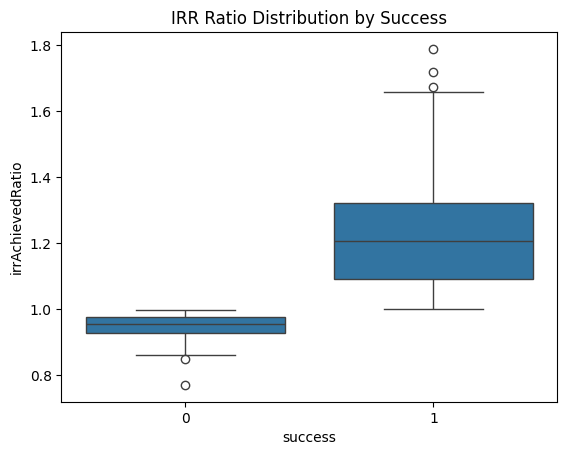

In [13]:
# Visualize the distribution of IRR achieved on success

sns.boxplot(data=data, x='success', y='irrAchievedRatio')
plt.title('IRR Ratio Distribution by Success')
plt.show()

**Preprocessing for Model Generation**

In [60]:
# Using IRR as metric for success

# Normalize column names
projectData.columns = projectData.columns.str.strip()
projectInv.columns = projectInv.columns.str.strip()

# First merge: project + outcome metrics
df = pd.merge(projectData, projectInv, left_on = "ID", right_on = "Project ID", how = "left")


# Convert date columns to datetime
date_cols = [col for col in df.columns if 'Date' in col or 'duration' in col]
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')

# Duration differences
df['duration_gap_days'] = (df['Dates - Actual duration of service provision - (Value)'] -
                           df['Dates - Anticipated duration of service provision - (Value)']).dt.days

df['start_to_actual_end_days'] = (df['Dates - Actual end date of service provision - (Value)'] -
                                  df['Dates - Start date of service provision - (Value)']).dt.days

# Ratio features
# df['roi_ratio'] = df['Overall project finance - Total outcome payments made - Amount USD - (Value)'] / \
#                   df['Investment Details - Total Funds Invested - Latest - Amount USD - (Value)']

# A "pre-outcome" version of ROI (hypothetical potential ROI)
df['roi_estimate'] = df['Overall project finance – maximum potential return'] / \
                     df['Investment Details - Total Funds Invested - Latest - Amount USD - (Value)']

df['potential_return_to_loss'] = df['Overall project finance – maximum potential return'] / \
                                 df['Overall Project Finance – maximum potential loss']


# Add calculated column to determine the ratio of current IRR to the target IRR
df['irrAchievedRatio'] = df['Investment Details - Internal Rate of Return - Latest - (Value)'] / df['Investment Details - Internal Rate of Return - Target - (Value)'] 

# See shape and head of new validated dataset
print(df.shape)
df.head()

(314, 53)


,ID,Impact Bond Name,Stage of Development,Dates - Date outcomes contract signed - (Value),Dates - Date contracts between all parties signed - (Value),Dates - Anticipated completion date - (Value),Dates - Actual completion date - (Value),Dates - Start date of service provision - (Value),Dates - Anticipated end date of service provision - (Value),Dates - Actual end date of service provision - (Value),...,success,Project ID,Total investment commitment,Maximum potential outcome payment,Outcome pricing,duration_gap_days,start_to_actual_end_days,roi_estimate,potential_return_to_loss,irrAchievedRatio
0,INDIGO-POJ-0001,Proyecta Tu Futuro [Plan Your Future] - Buenos...,Complete,2010-07-24,2010-07-24,2013-02-06,2013-02-06,2010-07-24,2013-02-06,2013-02-06,...,1,INDIGO-POJ-0001,249816.05,203880.14,405.89,0,928,0.227273,1.25,1.290256
1,INDIGO-POJ-0002,Aspire Social Impact Bond Adelaide,Implementation,2024-07-29,2024-07-29,2029-07-04,2029-07-04,2024-07-29,2029-07-04,2029-07-04,...,1,INDIGO-POJ-0002,162407.46,325905.17,752.29,0,1801,0.227273,1.25,1.131488
2,INDIGO-POJ-0003,Benevolent Society Social Benefit Bond (New So...,Planned,2018-07-10,2018-07-10,2020-01-24,2020-01-24,2018-07-10,2020-01-24,2020-01-24,...,1,INDIGO-POJ-0003,123233.44,77460.18,158.82,0,563,0.227273,1.25,1.084673
3,INDIGO-POJ-0004,Journey to Social Inclusion (Victoria),Implementation,2025-10-20,2025-10-20,2027-03-11,2027-03-11,2025-10-20,2027-03-11,2027-03-11,...,1,INDIGO-POJ-0004,108233.80,242217.67,383.76,0,507,0.227273,1.25,1.140102
4,INDIGO-POJ-0005,New South Wales Newpin Social Benefit Bond,Complete,2025-09-28,2025-09-28,2030-07-28,2030-07-28,2025-09-28,2030-07-28,2030-07-28,...,1,INDIGO-POJ-0005,432977.06,309846.19,585.54,0,1764,0.227273,1.25,1.457096


In [61]:
# Drop irrelevant or redundant data 

# Remove leaking column (Actual IRR used to define success)
df.drop(columns=['Investment Details - Internal Rate of Return - Latest - (Value)'], inplace=True, errors='ignore')

# Drop non-predictive or identifier columns
df.drop(columns=['ID', 'Impact Bond Name', 'Project ID'], inplace=True, errors='ignore')

# Drop columns with too many missing values
df = df.dropna(axis=1, thresh=int(0.6 * len(df)))  # Drop columns with >40% missing

# Drop all datetime columns
df = df.drop(df.select_dtypes(include=['datetime64[ns]']).columns, axis=1)

# Drop success variable
df = df.drop(columns=['success'])


# Include only Pre-investment features
safe_features = [
    "Overall Project Finance – maximum potential loss",
    "Overall project finance – maximum potential return",
    "Maximum potential outcome payment",
    "potential_return_to_loss",
    "Service and beneficiaries - Targeted number of unique service users or beneficiaries (total) - (Value)",
    "roi_estimate", "irrAchievedRatio"
]

# Create base df for all model creation

base_df = df[safe_features].copy()

base_df = base_df.dropna()

print(base_df.shape)
base_df.columns

(314, 7)


Index(['Overall Project Finance – maximum potential loss',
       'Overall project finance – maximum potential return',
       'Maximum potential outcome payment', 'potential_return_to_loss',
       'Service and beneficiaries - Targeted number of unique service users or beneficiaries (total) - (Value)',
       'roi_estimate', 'irrAchievedRatio'],
      dtype='object')

In [62]:
# Define the X and y variables

X = base_df.drop(columns=['irrAchievedRatio']) # Separate features

# Double-check for any object-type columns that weren't encoded
X = X.select_dtypes(include=[np.number])

y = base_df['irrAchievedRatio']


**Model Exploration**

In [ ]:
from sklearn.preprocessing import StandardScaler
# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale X
x_scaler = StandardScaler()
X_train_scaled = x_scaler.fit_transform(X_train)
X_test_scaled = x_scaler.transform(X_test)



Linear Regression

In [64]:
from sklearn.dummy import DummyRegressor

dummy = DummyRegressor(strategy="mean")
dummy.fit(X_train_scaled, y_train)
y_dummy_pred = dummy.predict(X_test)

from sklearn.metrics import r2_score
print("Baseline R²:", r2_score(y_test, y_dummy_pred))

Baseline R²: -0.0018496929438929222


In [65]:
# Basic OLS Regression

linear = LinearRegression()
linear.fit(X_train, y_train)

y_train_pred = linear.predict(X_train)
y_test_pred = linear.predict(X_test)

# Training Error
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

# Testing Error
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Training MSE: {train_mse:.2f}, \nTraining RMSE: {train_rmse:.2f}, R²: {train_r2:.2f}\n")
print(f"Test MSE: {test_mse:.2f}, \nTest RMSE: {test_rmse:.2f}, R²: {test_r2:.2f}\n")
print("Predictions:", y_test_pred[:5])
print("Actuals:", y_test[:5].values)

Training MSE: 0.03, 
Training RMSE: 0.17, R²: 0.14

Test MSE: 0.03, 
Test RMSE: 0.17, R²: 0.05

Predictions: [1.25792057 1.28126275 1.14357131 1.1447042  1.2326112 ]
Actuals: [1.04990758 1.78752108 1.27689031 1.13185185 1.        ]


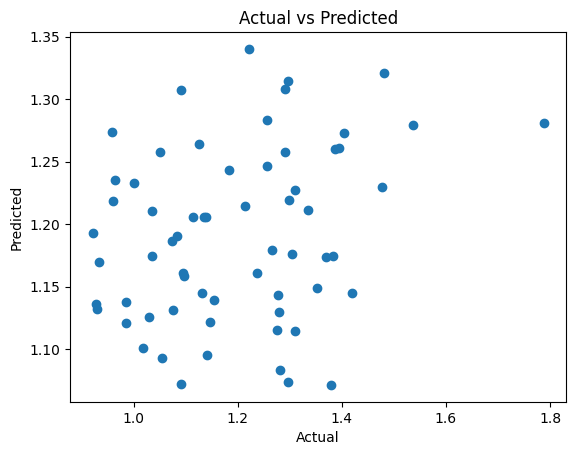

In [66]:
plt.scatter(y_test, y_test_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()

In [69]:
# Lasso Regression (L1 regularization)

from sklearn.linear_model import LassoCV

lasso_cv = LassoCV(alphas=[0.001, 0.01, 0.1, 1.0, 10], cv=5, max_iter=10000)
lasso_cv.fit(X_train, y_train)

print("Best alpha:", lasso_cv.alpha_)
print("R² on test:", lasso_cv.score(X_test, y_test))

Best alpha: 0.001
R² on test: 0.0889915152162174


In [70]:
# Create and fit Lasso model
lasso = Lasso(alpha=lasso_cv.alpha_)  # alpha controls the regularization strength
lasso.fit(X_train, y_train)

# Predict
y_train_pred_L1 = lasso.predict(X_train)
y_test_pred_L1 = lasso.predict(X_test)

# Training Error
train_mse_L1 = mean_squared_error(y_train, y_train_pred_L1)
train_rmse_L1 = np.sqrt(train_mse_L1)
train_r2_L1 = r2_score(y_train, y_train_pred_L1)

# Testing Error
test_mse_L1 = mean_squared_error(y_test, y_test_pred_L1)
test_rmse_L1 = np.sqrt(test_mse_L1)
test_r2_L1 = r2_score(y_test, y_test_pred_L1)

print(f"Training MSE: {train_mse_L1:.2f}, \nTraining RMSE: {train_rmse_L1:.2f}, R²: {train_r2_L1:.2f}\n")
print(f"Test MSE: {test_mse_L1:.2f}, \nTest RMSE: {test_rmse_L1:.2f}, R²: {test_r2_L1:.2f}\n")
print("Predictions:", y_test_pred_L1[:5])
print("Actuals:", y_test[:5].values)

Training MSE: 0.03, 
Training RMSE: 0.17, R²: 0.13

Test MSE: 0.03, 
Test RMSE: 0.17, R²: 0.09

Predictions: [1.23128072 1.26690539 1.14342917 1.16315222 1.23532824]
Actuals: [1.04990758 1.78752108 1.27689031 1.13185185 1.        ]


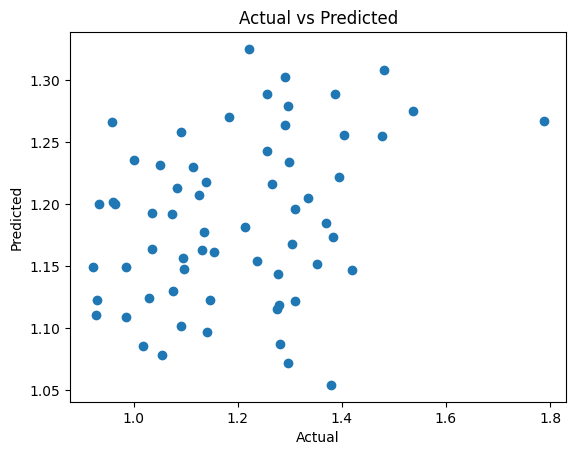

In [71]:
plt.scatter(y_test, y_test_pred_L1)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()

In [72]:
# Ridge Regression (L2 regularization)

from sklearn.linear_model import RidgeCV

ridge_cv = RidgeCV(alphas=[0.1, 1.0, 10.0, 100.0], cv=5)
ridge_cv.fit(X_train, y_train)
print("Best alpha:", ridge_cv.alpha_)
print("R² on test:", ridge_cv.score(X_test, y_test))

Best alpha: 0.1
R² on test: 0.08859913217305426


In [73]:
# Create and fit Ridge model
ridge = Ridge(alpha=ridge_cv.alpha_)  # alpha is the regularization strength
ridge.fit(X_train, y_train)

# Predict
y_train_pred_L2 = ridge.predict(X_train)
y_test_pred_L2 = ridge.predict(X_test)

# Training Error
train_mse = mean_squared_error(y_train, y_train_pred_L2)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred_L2)

# Testing Error
test_mse = mean_squared_error(y_test, y_test_pred_L2)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred_L2)

print(f"Training MSE: {train_mse:.2f}, \nTraining RMSE: {train_rmse:.2f}, R²: {train_r2:.2f}\n")
print(f"Test MSE: {test_mse:.2f}, \nTest RMSE: {test_rmse:.2f}, R²: {test_r2:.2f}\n")
print("Predictions:", y_test_pred[:5])
print("Actuals:", y_test[:5].values)


Training MSE: 0.03, 
Training RMSE: 0.17, R²: 0.13

Test MSE: 0.03, 
Test RMSE: 0.17, R²: 0.09

Predictions: [1.25792057 1.28126275 1.14357131 1.1447042  1.2326112 ]
Actuals: [1.04990758 1.78752108 1.27689031 1.13185185 1.        ]


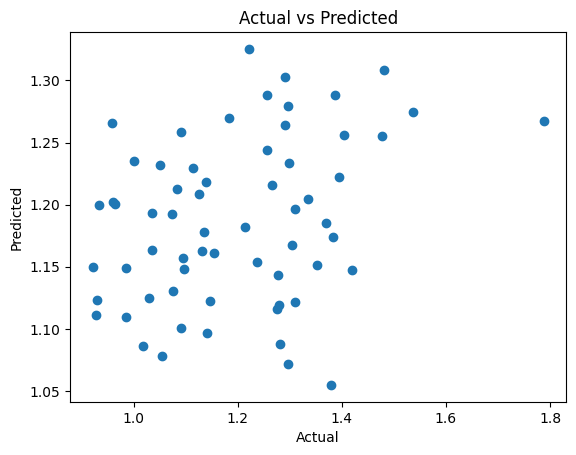

In [74]:
plt.scatter(y_test, y_test_pred_L2)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()

In [75]:
# Comparing different linear regression models

results = [
    {
        "Model": "Linear",
        "Train MSE": mean_squared_error(y_train, y_train_pred),
        "Train RMSE": np.sqrt(mean_squared_error(y_train, y_train_pred)),
        "Test MSE": mean_squared_error(y_test, y_test_pred),
        "Test RMSE": np.sqrt(mean_squared_error(y_test, y_test_pred)),
        "Train R²": r2_score(y_train, y_train_pred),
        "Test R²": r2_score(y_test, y_test_pred)
    },
    {
        "Model": "Lasso",
        "Train MSE": mean_squared_error(y_train, y_train_pred_L1),
        "Train RMSE": np.sqrt(mean_squared_error(y_train, y_train_pred_L1)),
        "Test MSE": mean_squared_error(y_test, y_test_pred_L1),
        "Test RMSE": np.sqrt(mean_squared_error(y_test, y_test_pred_L1)),
        "Train R²": r2_score(y_train, y_train_pred_L1),
        "Test R²": r2_score(y_test, y_test_pred_L1)
    },
    {
        "Model": "Ridge",
        "Train MSE": mean_squared_error(y_train, y_train_pred_L2),
        "Train RMSE": np.sqrt(mean_squared_error(y_train, y_train_pred_L2)),
        "Test MSE": mean_squared_error(y_test, y_test_pred_L2),
        "Test RMSE": np.sqrt(mean_squared_error(y_test, y_test_pred_L2)),
        "Train R²": r2_score(y_train, y_train_pred_L2),
        "Test R²": r2_score(y_test, y_test_pred_L2)
    }
]

results_df = pd.DataFrame(results)
print(results_df)

    Model  Train MSE  Train RMSE  Test MSE  Test RMSE  Train R²   Test R²
0  Linear   0.028031    0.167425  0.028699   0.169407  0.136786  0.054612
1   Lasso   0.028411    0.168556  0.027655   0.166298  0.125084  0.088992
2   Ridge   0.028399    0.168519  0.027667   0.166334  0.125467  0.088599


*Testing Regression*

In [76]:
# Create DataFrame for analysis
results = X_test.copy()
results['Predicted Ratio'] = y_test_pred
results['Actual Ratio'] = y_test.values

# Define a success threshold (e.g., 1.0 = success)
results['Actual Success'] = results['Actual Ratio'] >= 1.0

# Define investment strategy: invest if predicted ratio >= 1.0
results['Strategy Decision'] = results['Predicted Ratio'] >= 1.0

# Evaluate strategy performance
strategy_df = results[results['Strategy Decision']]
total_investments = len(strategy_df)
correct_predictions = (strategy_df['Actual Success']).sum()
strategy_accuracy = correct_predictions / total_investments

print(f"Invested in {total_investments} projects.")
print(f"{correct_predictions} of them were actually successful.")
print(f"Strategy accuracy: {strategy_accuracy:.2%}")

Invested in 63 projects.
54 of them were actually successful.
Strategy accuracy: 85.71%


In [79]:
# Create DataFrame for analysis
results = X_test.copy()
results['Predicted Ratio'] = y_test_pred_L1
results['Actual Ratio'] = y_test.values

# Define a success threshold (e.g., 1.0 = success)
results['Actual Success'] = results['Actual Ratio'] >= 1.0

# Define investment strategy: invest if predicted ratio >= 1.0
results['Strategy Decision'] = results['Predicted Ratio'] >= 1.0

# Evaluate strategy performance
strategy_df = results[results['Strategy Decision']]
total_investments = len(strategy_df)
correct_predictions = (strategy_df['Actual Success']).sum()
strategy_accuracy = correct_predictions / total_investments

print(f"Invested in {total_investments} projects.")
print(f"{correct_predictions} of them were actually successful.")
print(f"Strategy accuracy: {strategy_accuracy:.2%}")

Invested in 63 projects.
54 of them were actually successful.
Strategy accuracy: 85.71%


In [80]:
# Create DataFrame for analysis
results = X_test.copy()
results['Predicted Ratio'] = y_test_pred_L2
results['Actual Ratio'] = y_test.values

# Define a success threshold (e.g., 1.0 = success)
results['Actual Success'] = results['Actual Ratio'] >= 1.0

# Define investment strategy: invest if predicted ratio >= 1.0
results['Strategy Decision'] = results['Predicted Ratio'] >= 1.0

# Evaluate strategy performance
strategy_df = results[results['Strategy Decision']]
total_investments = len(strategy_df)
correct_predictions = (strategy_df['Actual Success']).sum()
strategy_accuracy = correct_predictions / total_investments

print(f"Invested in {total_investments} projects.")
print(f"{correct_predictions} of them were actually successful.")
print(f"Strategy accuracy: {strategy_accuracy:.2%}")

Invested in 63 projects.
54 of them were actually successful.
Strategy accuracy: 85.71%


In [ ]:
# Merge back return/loss data to test generalized linear trading strategy

strategy_df = strategy_df.copy()

# If successful, get full maximum return; otherwise, get nothing
strategy_df['Realized Return ($)'] = (
    strategy_df['Overall project finance – maximum potential return'] * 
    strategy_df['Actual Success'].astype(int)
)

# Strategy summary
total_return = strategy_df['Realized Return ($)'].sum()
avg_return = strategy_df['Realized Return ($)'].mean()
num_investments = len(strategy_df)
strategy_accuracy = strategy_df['Actual Success'].mean()

print(f"Total realized return: ${total_return:,.2f}")
print(f"Average return per investment: ${avg_return:,.2f}")
print(f"Number of investments: {num_investments}")
print(f"Success rate of strategy: {strategy_accuracy:.2%}")


Total realized return: $4,049,745.40
Average return per investment: $64,281.67
Number of investments: 63
Success rate of strategy: 85.71%


In [81]:
# Make a copy of the strategy DataFrame and test trading strategy by investing in predicted highest performing SIBs (ones with highest IRR Achieved Ratio)
strategy_df = strategy_df.copy()

# Calculate realized return: if successful, full potential return; else, $0
strategy_df['Realized Return ($)'] = (
    strategy_df['Overall project finance – maximum potential return'] * 
    strategy_df['Actual Success'].astype(int)
)

# Sort the invested projects by actual IRR achieved ratio (Actual Ratio)
top_irr_projects = strategy_df.sort_values(by='Actual Ratio', ascending=False).head(8)

# Display top 8 investments by actual performance
print("\nTop 8 investments ranked by actual IRR ratio achieved:")
print(top_irr_projects[['Predicted Ratio', 'Actual Ratio', 'Realized Return ($)', 'Actual Success']])

# Summary of top 8 investments
top_total_return = top_irr_projects['Realized Return ($)'].sum()
top_avg_return = top_irr_projects['Realized Return ($)'].mean()
top_strategy_accuracy = top_irr_projects['Actual Success'].mean()

print(f"\nSummary for Top 8 IRR Achieved Investments:")
print(f"Total realized return: ${top_total_return:,.2f}")
print(f"Average return per investment: ${top_avg_return:,.2f}")
print(f"Success rate: {top_strategy_accuracy:.2%}")

# Summarize the full strategy
total_return = strategy_df['Realized Return ($)'].sum()
avg_return = strategy_df['Realized Return ($)'].mean()
num_investments = len(strategy_df)
strategy_accuracy = strategy_df['Actual Success'].mean()

print(f"\nOverall Strategy Summary:")
print(f"Total realized return: ${total_return:,.2f}")
print(f"Average return per investment: ${avg_return:,.2f}")
print(f"Number of investments: {num_investments}")
print(f"Success rate of strategy: {strategy_accuracy:.2%}")


Top 8 investments ranked by actual IRR ratio achieved:
     Predicted Ratio  Actual Ratio  Realized Return ($)  Actual Success
33          1.267095      1.787521            105367.21            True
17          1.274998      1.536873            107873.75            True
183         1.308537      1.480208            112357.86            True
242         1.254931      1.477650            118211.83            True
300         1.147100      1.418681             49640.20            True
119         1.255705      1.404789            100087.11            True
279         1.222652      1.394444            114455.22            True
116         1.288128      1.386489            100061.48            True

Summary for Top 8 IRR Achieved Investments:
Total realized return: $808,054.66
Average return per investment: $101,006.83
Success rate: 100.00%

Overall Strategy Summary:
Total realized return: $4,049,745.40
Average return per investment: $64,281.67
Number of investments: 63
Success rate of str

Neural Networking (Feedforward dropout)

In [82]:
!pip install tensorflow

In [ ]:
# Normalize features with scaler

# Scale X
x_scaler = StandardScaler()
X_train_scaled = x_scaler.fit_transform(X_train)
X_test_scaled = x_scaler.transform(X_test)

# Scale y
y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = y_scaler.transform(y_test.values.reshape(-1, 1))

In [84]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Build MLP model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))  # Regression output

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.fit(X_train_scaled, y_train_scaled, epochs=30, batch_size=16, validation_split=0.2)

Epoch 1/30


c:\Users\Hollo\anaconda3\envs\tf-env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.9825 - mae: 0.7745 - val_loss: 1.0470 - val_mae: 0.7948
Epoch 2/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.7571 - mae: 0.6915 - val_loss: 1.0818 - val_mae: 0.8131
Epoch 3/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6418 - mae: 0.6309 - val_loss: 1.0647 - val_mae: 0.8128
Epoch 4/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.7714 - mae: 0.7002 - val_loss: 1.0725 - val_mae: 0.8182
Epoch 5/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.7301 - mae: 0.6957 - val_loss: 1.1051 - val_mae: 0.8229
Epoch 6/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.7838 - mae: 0.7121 - val_loss: 1.0690 - val_mae: 0.8132
Epoch 7/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6206 - mae: 0.6370 - val_loss: 1.1001 - val_mae: 0.8252
Epoch 8/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6896 - mae: 0.6560 - val_loss: 1.0899 - val_mae: 0.8274
Epoch 9/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.7221 - mae: 0.6864 - v

In [86]:
# Evalute the model
test_loss, test_mae = model.evaluate(X_test_scaled, y_test_scaled)
print(f"Test MSE: {test_loss:.4f}")
print(f"Test MAE: {test_mae:.4f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 1.0086 - mae: 0.8371
Test MSE: 0.9148
Test MAE: 0.7889


In [87]:
# Make predictions on the test set
y_pred_scaled = model.predict(X_test_scaled)

# Inverse transform the scaled predictions back to the original scale
y_pred = y_scaler.inverse_transform(y_pred_scaled)

# Inverse transform the actual y_test values back to the original scale
y_test_original = y_scaler.inverse_transform(y_test_scaled)

# Compare the predictions with the actual values (in original scale)
print(f"Predicted values: \n {y_pred[:5]}")
print(f"Actual values: \n {y_test_original[:5]}")

# Calculate R^2 (coefficient of determination) on the original scale
from sklearn.metrics import r2_score
r2 = r2_score(y_test_original, y_pred)
print(f"R^2: {r2:.4f}")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Predicted values: 
 [[1.2533938]
 [1.2891365]
 [1.0552158]
 [1.1998057]
 [1.0819739]]
Actual values: 
 [[1.04990758]
 [1.78752108]
 [1.27689031]
 [1.13185185]
 [1.        ]]
R^2: 0.0214


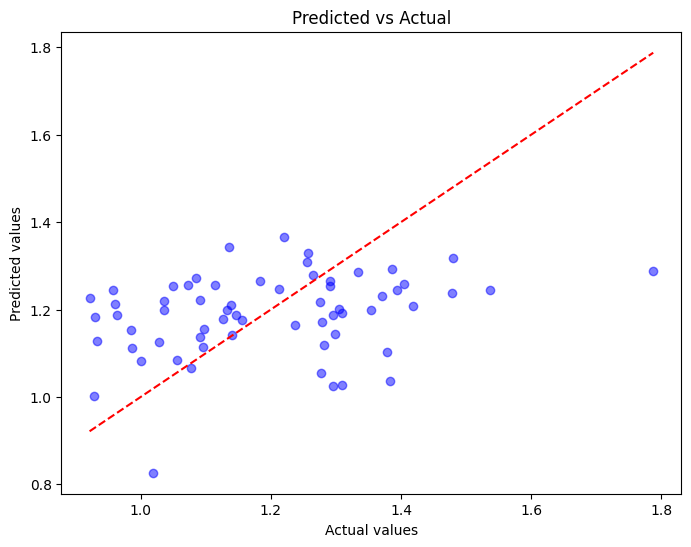

In [88]:

# Plot predicted vs actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test_original, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test_original), max(y_test_original)], [min(y_test_original), max(y_test_original)], color='red', linestyle='--')
plt.title("Predicted vs Actual")
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.show()

Epoch 1/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.5343 - mae: 0.5943 - val_loss: 1.0492 - val_mae: 0.7988
Epoch 2/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.4985 - mae: 0.5736 - val_loss: 1.1218 - val_mae: 0.8200
Epoch 3/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4709 - mae: 0.5517 - val_loss: 1.0726 - val_mae: 0.8051
Epoch 4/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.4898 - mae: 0.5669 - val_loss: 1.0616 - val_mae: 0.8046
Epoch 5/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4640 - mae: 0.5303 - val_loss: 1.0658 - val_mae: 0.8122
Epoch 6/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.5182 - mae: 0.5870 - val_loss: 1.0841 - val_mae: 0.8087
Epoch 7/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.4736 - mae: 0.5559 - val_loss: 1.0370 - val_mae: 0.7959
Epoch 8/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3850 - mae: 0.5010 - val_loss: 1.0525 - val_mae: 0.8050
Epoch 9/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.5127 - mae

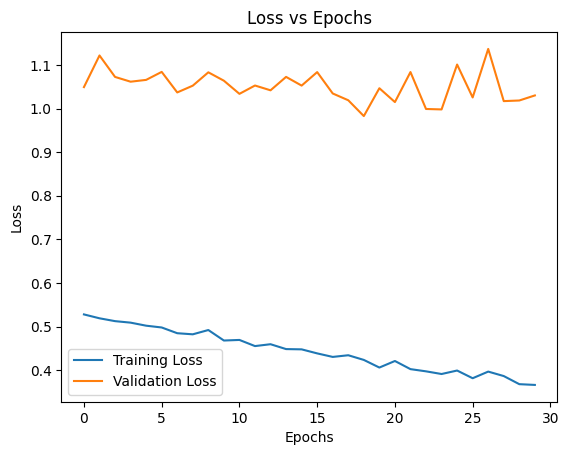

In [89]:
history = model.fit(X_train_scaled, y_train_scaled, epochs=30, batch_size=16, validation_split=0.2)

# Plot loss curves
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Loss vs Epochs")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [90]:
# Predict IRR ratios using the MLP model
y_test_pred_mlp = model.predict(X_test_scaled)

# Create DataFrame for analysis
results_mlp = X_test.copy()
results_mlp['Predicted Ratio'] = y_scaler.inverse_transform(y_test_pred_mlp)
results_mlp['Actual Ratio'] = y_test.values

# Define success based on actual IRR ratio
results_mlp['Actual Success'] = results_mlp['Actual Ratio'] >= 1.0

# Define investment strategy: invest in top N predicted ratios >= 1.0
# Sort the results based on predicted ratio
results_mlp_sorted = results_mlp.sort_values(by='Predicted Ratio', ascending=False)

# Filter investments where predicted ratio >= 1.0
investable_projects = results_mlp_sorted[results_mlp_sorted['Predicted Ratio'] >= 1.0]

# Select top N projects to invest in (e.g., top 8)
top_n = 8
invested_projects = investable_projects.head(top_n)

#Evaluate strategy performance
total_investments_mlp = len(invested_projects)
correct_predictions_mlp = (invested_projects['Actual Success']).sum()
strategy_accuracy_mlp = correct_predictions_mlp / total_investments_mlp

# Print strategy evaluation
print(f"Invested in {total_investments_mlp} projects based on MLP predictions.")
print(f"{correct_predictions_mlp} of them were actually successful.")
print(f"Strategy accuracy: {strategy_accuracy_mlp:.2%}")

# Merge back return/loss data

invested_projects = invested_projects.copy()

# If successful, get full maximum return; otherwise, get nothing
invested_projects['Realized Return ($)'] = (
    invested_projects['Overall project finance – maximum potential return'] * 
    invested_projects['Actual Success'].astype(int)
)

# Strategy summary
total_return_mlp = invested_projects['Realized Return ($)'].sum()
avg_return_mlp = invested_projects['Realized Return ($)'].mean()
num_investments_mlp = len(invested_projects)
strategy_accuracy_mlp = invested_projects['Actual Success'].mean()

print(f"Total realized return: ${total_return_mlp:,.2f}")
print(f"Average return per investment: ${avg_return_mlp:,.2f}")
print(f"Number of investments: {num_investments_mlp}")
print(f"Success rate of strategy: {strategy_accuracy_mlp:.2%}")

print(f"Success rate of strategy: {strategy_accuracy_mlp:.2%}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Invested in 8 projects based on MLP predictions.
8 of them were actually successful.
Strategy accuracy: 100.00%
Total realized return: $804,766.51
Average return per investment: $100,595.81
Number of investments: 8
Success rate of strategy: 100.00%
Success rate of strategy: 100.00%


Feedforward MLP with Dropout Layer

In [91]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras import models, layers


# Define the model
inputs = layers.Input(shape=(X_train_scaled.shape[1],)) 

x = layers.Dense(128, activation='relu')(inputs)
x = Dropout(0.2)(x)  # Dropout layer to reduce overfitting
x = layers.Dense(64, activation='relu')(x)
x = Dropout(0.2)(x)
outputs = layers.Dense(1)(x)

# Create the model
dropout_model = models.Model(inputs=inputs, outputs=outputs)

# Compile the model
dropout_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
dropout_history = dropout_model.fit(X_train_scaled, y_train_scaled, epochs=30, batch_size=16, validation_split=0.2)


Epoch 1/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.8565 - mae: 0.7188 - val_loss: 1.1353 - val_mae: 0.8223
Epoch 2/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.8930 - mae: 0.7587 - val_loss: 1.0559 - val_mae: 0.8056
Epoch 3/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.7909 - mae: 0.7128 - val_loss: 1.0516 - val_mae: 0.8041
Epoch 4/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.8430 - mae: 0.7559 - val_loss: 1.0772 - val_mae: 0.8095
Epoch 5/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.7642 - mae: 0.7203 - val_loss: 1.0804 - val_mae: 0.8131
Epoch 6/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.7340 - mae: 0.6936 - val_loss: 1.0978 - val_mae: 0.8156
Epoch 7/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.7818 - mae: 0.7048 - val_loss: 1.0677 - val_mae: 0.8104
Epoch 8/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.7018 - mae: 0.6825 - val_loss: 1.0468 - val_mae: 0.8065
Epoch 9/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6885 - mae:

In [92]:
# Evaluate the model on the test set
dtest_loss, dtest_mae = dropout_model.evaluate(X_test_scaled, y_test_scaled)
print(f"Test Loss (MSE): {dtest_loss:.4f}")
print(f"Test MAE: {dtest_mae:.4f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.9390 - mae: 0.7910
Test Loss (MSE): 0.8638
Test MAE: 0.7476


In [93]:
# Make predictions on the test set
dy_pred_scaled = dropout_model.predict(X_test_scaled)

# Inverse transform the scaled predictions back to the original scale
y_pred = y_scaler.inverse_transform(dy_pred_scaled)

# Inverse transform the actual y_test values back to the original scale
y_test_original = y_scaler.inverse_transform(y_test_scaled)

# Compare the predictions with the actual values (in original scale)
print(f"Predicted values: \n {y_pred[:5]}")
print(f"Actual values: \n {y_test_original[:5]}")

# Calculate R^2 (coefficient of determination) on the original scale
from sklearn.metrics import r2_score
r2 = r2_score(y_test_original, y_pred)
print(f"R^2: {r2:.4f}")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Predicted values: 
 [[1.2356145]
 [1.2709943]
 [1.0716883]
 [1.1917963]
 [1.1323317]]
Actual values: 
 [[1.04990758]
 [1.78752108]
 [1.27689031]
 [1.13185185]
 [1.        ]]
R^2: 0.0759


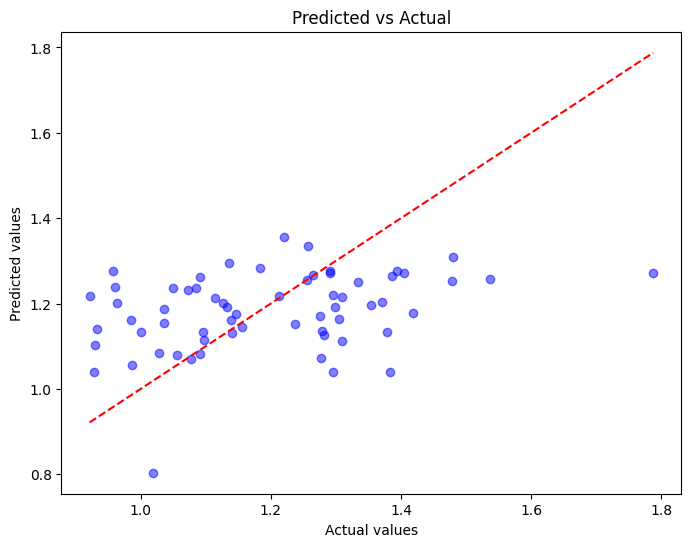

In [94]:
# Plot predicted vs actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test_original, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test_original), max(y_test_original)], [min(y_test_original), max(y_test_original)], color='red', linestyle='--')
plt.title("Predicted vs Actual")
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.show()

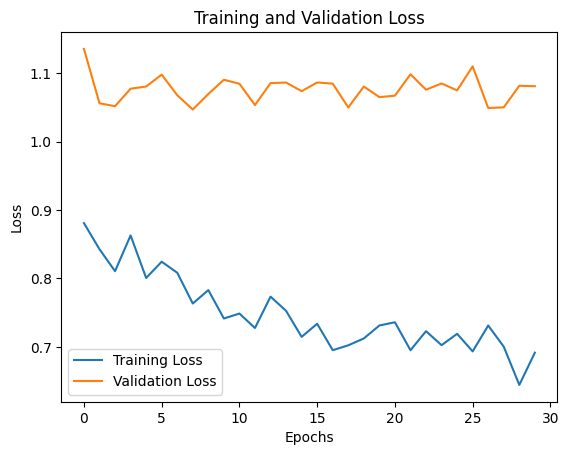

In [95]:
# Optional: Plot the training and validation loss
plt.plot(dropout_history.history['loss'], label='Training Loss')
plt.plot(dropout_history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.show()

In [96]:
# Predict IRR ratios using the MLP model
y_test_pred_dropout = dropout_model.predict(X_test_scaled)

# Create DataFrame for analysis
results_dropout = X_test.copy()
results_dropout['Predicted Ratio'] = y_scaler.inverse_transform(y_test_pred_mlp)
results_dropout['Actual Ratio'] = y_test.values

# Define success based on actual IRR ratio
results_dropout['Actual Success'] = results_dropout['Actual Ratio'] >= 1.0

# Define investment strategy: invest in top N predicted ratios >= 1.0
# Sort the results based on predicted ratio
results_dropout_sorted = results_dropout.sort_values(by='Predicted Ratio', ascending=False)

# Filter investments where predicted ratio >= 1.0
investable_projects_dropout = results_dropout_sorted[results_dropout_sorted['Predicted Ratio'] >= 1.0]

# Select top N projects to invest in (e.g., top 8)
top_n = 8
invested_projects_dropout = investable_projects_dropout.head(top_n)

#Evaluate strategy performance
total_investments_dropout = len(invested_projects_dropout)
correct_predictions_dropout = (invested_projects_dropout['Actual Success']).sum()
strategy_accuracy_dropout = correct_predictions_dropout / total_investments_dropout

# Print strategy evaluation
print(f"Invested in {total_investments_dropout} projects based on MLP predictions.")
print(f"{correct_predictions_dropout} of them were actually successful.")
print(f"Strategy accuracy: {strategy_accuracy_dropout:.2%}")

# Merge back return/loss data

invested_projects_dropout = invested_projects_dropout.copy()

# If successful, get full maximum return; otherwise, get nothing
invested_projects_dropout['Realized Return ($)'] = (
    invested_projects_dropout['Overall project finance – maximum potential return'] * 
    invested_projects_dropout['Actual Success'].astype(int)
)

# Strategy summary
total_return_dropout = invested_projects_dropout['Realized Return ($)'].sum()
avg_return_dropout = invested_projects_dropout['Realized Return ($)'].mean()
num_investments_dropout = len(invested_projects_dropout)
strategy_accuracy_dropout = invested_projects_dropout['Actual Success'].mean()

print(f"Total realized return: ${total_return_dropout:,.2f}")
print(f"Average return per investment: ${avg_return_dropout:,.2f}")
print(f"Number of investments: {num_investments_dropout}")
print(f"Success rate of strategy: {strategy_accuracy_dropout:.2%}")

print(f"Success rate of strategy: {strategy_accuracy_dropout:.2%}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Invested in 8 projects based on MLP predictions.
8 of them were actually successful.
Strategy accuracy: 100.00%
Total realized return: $804,766.51
Average return per investment: $100,595.81
Number of investments: 8
Success rate of strategy: 100.00%
Success rate of strategy: 100.00%
